<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/exp4/exp4_csai_plotting.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

Experiment No.4, Plot all data

> This notebook is for experiment \<exp4\> and data sample \<csai\>.

### Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/exp4/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)

### Loading data

In [2]:
sys.path.insert(1, '../../')
import numpy as np, sys, os
from getting_data import get
from feature_masking import masking_options

sample_data_and_config_arr = get('exp4', 'csai')

for sample_data_and_config in sample_data_and_config_arr:
    y_values = []
    sample_origin_npy = sample_data_and_config['origin']
    for array in sample_data_and_config['feature_stack']:

        # define your y axis value here
        y_value = np.absolute((sample_origin_npy - array) / sample_origin_npy)
        # y_value = sample_origin_npy - array
        y_values.append(y_value)

    y_values = np.array(y_values)
    sample_data_and_config['y_values'] = y_values


Got sample data: csai


### Plot the data

(4046/39344) (10.28%) valid data for csai (original score is greater than -10)


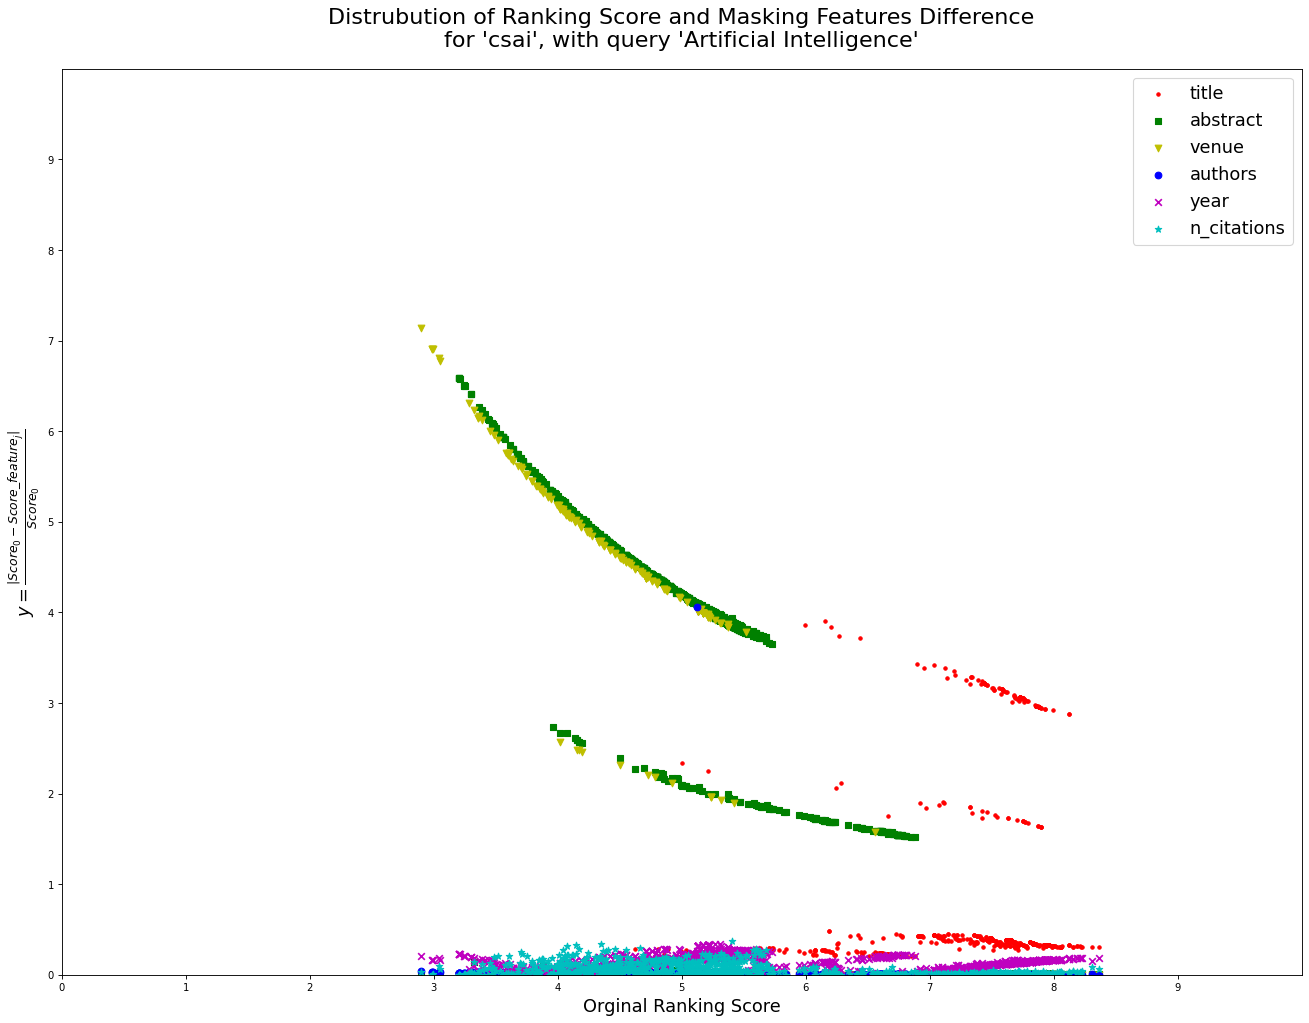

In [3]:
import matplotlib.pyplot as plt
def plot_scores_d(sample_name, y_values, sample_origin_npy, query, sample_masking_option_keys): 
  plt.figure(figsize=(20, 15), dpi=80)
  i = 0
  for key in sample_masking_option_keys:
    plt.scatter(
        sample_origin_npy,
        y_values[i],
        c=masking_options[key]['color'], 
        marker=masking_options[key]['marker'],
        label=masking_options[key]['plot_legend']
    )
    i += 1

  plt.xlabel('Orginal Ranking Score',fontsize=16)
  plt.ylabel('$y = \\frac{|Score_0 - Score\_feature_j|}{Score_0}$', fontsize=16)
  plt.title(f'Distrubution of Ranking Score and Masking Features Difference\nfor \'{sample_name}\', with query \'{query}\'', fontsize=20, pad=20)
  x_max = 10
  x_min = 0
  x_pace = 1
  y_max = 10
  y_min = 0
  y_pace = 1
  plt.xticks(np.arange(x_min, x_max, x_pace), size = 9) 
  plt.yticks(np.arange(y_min, y_max, y_pace), size = 9)
  plt.ylim(y_min, y_max)
  plt.xlim(x_min, x_max)
  plt.legend(prop={'size': 16})
  plt.savefig(os.path.join('.', 'plot', f'{sample_name}.png'), facecolor='white', transparent=False)
  plt.show()

for sample_data_and_config in sample_data_and_config_arr:
  sample_and_task_name = sample_data_and_config['sample_and_task_name']
  sample_origin_npy = sample_data_and_config['origin']
  y_values = sample_data_and_config['y_values']

  valid_data_count = 0
  total_data_count = 0
  for d in sample_origin_npy:
    total_data_count += 1
    if d > -10:
      valid_data_count += 1
  print(f'({valid_data_count}/{total_data_count}) ({round((valid_data_count / total_data_count) * 100, 2)}%) valid data for {sample_and_task_name} (original score is greater than -10)')

  sample_query = sample_data_and_config['query']
  sample_masking_option_keys = sample_data_and_config['masking_option_keys']
  plot_scores_d(sample_and_task_name, y_values, sample_origin_npy, sample_query, sample_masking_option_keys)
